<a href="https://colab.research.google.com/github/Meyssemmedini/food-sales-predictions/blob/main/sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#part 1

In [2]:
#imprt packages
import pandas as pd
import numpy as np

In [3]:
filename = ('/content/drive/MyDrive/coding dojo/data sets/sales_predictions_2023.csv')

In [4]:
df = pd.read_csv( filename)
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
#n the dimensions of the DataFrame. (rows, columns)
df.shape

(8523, 12)

In [6]:
#summary information about the DataFrame (non null count and data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Count the number of duplicate rows in a DataFrame.
df.duplicated().sum()
if df.duplicated().sum() == 0:
  print("there is no duplicated rows in our dataframe")

there is no duplicated rows in our dataframe


In [8]:
#identifiying the missing data
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

for Item_Weight

In [9]:
percent_missing = df['Item_Weight'].isna().sum() / df.shape[0]
'{:.0%}'.format(percent_missing)

'17%'

We opt not to eliminate rows due to the substantial amount of missing data, and we refrain from discarding entire columns since the missing values are not significant enough to warrant such removal.

In [10]:
df['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Grouping by 'item_type': The groupby('item_type') operation divides the DataFrame into groups based on unique values in the 'item_type' column.

Applying a function to each group: The apply() function allows you to apply a function to each group of the DataFrame. In this case, you want to count the missing values in the 'item_weight' column for each group.

Using lambda to define a short function: The lambda x: x.isna().sum() is a concise way to define a function that takes a group (x) and calculates the sum of missing values using isna().

Summarizing missing values for each group: The apply(lambda x: x.isna().sum()) expression is applied to each group, and it calculates the sum of missing values for the 'item_weight' column within each group.

In [11]:
 df.groupby('Item_Type')['Item_Weight'].apply(lambda a: a.isna().sum())

Item_Type
Baking Goods             112
Breads                    47
Breakfast                 21
Canned                   110
Dairy                    116
Frozen Foods             138
Fruits and Vegetables    213
Hard Drinks               31
Health and Hygiene        90
Household                151
Meat                      88
Others                    32
Seafood                   13
Snack Foods              212
Soft Drinks               71
Starchy Foods             18
Name: Item_Weight, dtype: int64

In [12]:
#setting condition
cond_1 = df['Item_Type'] == 'Baking Goods'
cond_2 = df['Item_Type'] == 'Breads'
cond_3 = df['Item_Type'] == 'Breakfast'
cond_4 = df['Item_Type'] == 'Canned'
cond_5 = df['Item_Type'] == 'Dairy'
cond_6 = df['Item_Type'] == 'Frozen Foods'
cond_7 = df['Item_Type'] == 'Fruits and Vegetables'
cond_8 = df['Item_Type'] == 'Hard Drinks'
cond_9 = df['Item_Type'] == 'Health and Hygiene'
cond_10 = df['Item_Type'] == 'Household'
cond_11 = df['Item_Type'] == 'Meat'
cond_12 = df['Item_Type'] == 'Others'
cond_13 = df['Item_Type'] == 'Seafood'
cond_14 = df['Item_Type'] == 'Snack Foods'
cond_15 = df['Item_Type'] == 'Soft Drinks'
cond_16 = df['Item_Type'] == 'Starchy Food'

In [13]:
df[cond_8].isna().sum()

Item_Identifier               0
Item_Weight                  31
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                  66
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
dtype: int64

In [14]:
#calculating the mean for each item type
def calculate_mean_weight_by_type(df,Item_Type,Item_Weight):
    mean_weight_by_type = df.groupby(Item_Type)[Item_Weight].mean()

    return mean_weight_by_type
calculate_mean_weight_by_type (df,'Item_Type', 'Item_Weight')

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

i didn't find a way to fill each groupby by it's mean

In [15]:
df['Item_Weight'].fillna(value =df['Item_Weight'].mean(),inplace=True )

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


or we can fill the missing Item_Weight with the mean of each Item_Type that correspond to it .

###for Outlet_Size

In [18]:
percent_missing2 = df['Outlet_Size'].isna().sum() / df.shape[0]
'{:.0%}'.format(percent_missing2)

'28%'

We opt not to eliminate rows due to the substantial amount of missing data, and we refrain from discarding entire columns since the missing values are not significant enough to warrant such removal.



In [19]:
# Check the unique values and counts of the 'Outlet_Sizee' column
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

looking for a relation between the two columns outlet_size and outlet_type

In [21]:
type_medium_outlet= (df['Outlet_Size'] == "Medium")  &  ( df['Outlet_Type'] )
df[type_medium_outlet]['Outlet_Type'].value_counts()

Supermarket Type3    935
Supermarket Type1    930
Supermarket Type2    928
Name: Outlet_Type, dtype: int64

In [22]:
type_small_outlet= (df['Outlet_Size'] == "Small")  &  ( df['Outlet_Type'] )
df[type_small_outlet]['Outlet_Type'].value_counts()

Supermarket Type1    1860
Grocery Store         528
Name: Outlet_Type, dtype: int64

In [23]:
type_High_outlet= (df['Outlet_Size'] == "High")  &  ( df['Outlet_Type'] )
df[type_High_outlet]['Outlet_Type'].value_counts()

Supermarket Type1    932
Name: Outlet_Type, dtype: int64

we are going to Impute Missing Values of Outlet_Size based on the realtion between Outlet_Type and Outlet_Size

In [24]:
#filling the rows that have Outlet_Type' == 'Supermarket Type1' with Outlet_Size' = 'High'
condition_1 = df['Outlet_Type'] == 'Supermarket Type1'
if condition_1.any():
    df.loc[condition_1, 'Outlet_Size'] = df.loc[condition_1, 'Outlet_Size'].fillna('High')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,High,Tier 2,Supermarket Type1,4710.5350


In [25]:
#filling the rows that have Outlet_Type' == 'Grocery Store' with Outlet_Size' = 'Small'

condition_2 = df['Outlet_Type'] == 'Grocery Store'
if condition_2.any():
    df.loc[condition_2, 'Outlet_Size'] = df.loc[condition_2, 'Outlet_Size'].fillna('Small')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,High,Tier 2,Supermarket Type1,4710.5350


In [26]:
#filling the rest with Medium
df.fillna('Medium')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
#Confirm that there are no more missing values after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Check for Inconsistencies in Categorical Values

In [28]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
#Generate descriptive statistics of numerical columns.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#part 3

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

##Histogram

<ipython-input-33-a05cb56f45a6>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


Text(0, 0.5, 'Count')

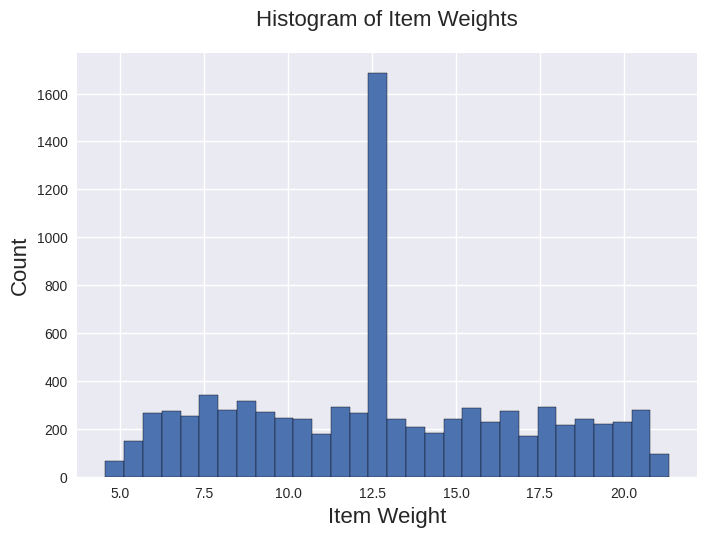

In [33]:
#creating Histogram to view the distributions of featuresin the data
plt.style.use('seaborn');
df['Item_Weight'].hist(bins = 30, edgecolor='black');
plt.ticklabel_format(useOffset=False, style='plain');
plt.title('Histogram of Item Weights', fontsize=16, pad = 20)
plt.xlabel('Item Weight', fontsize=16)
plt.ylabel('Count', fontsize=16)

Text(0.5, 1.0, 'Histogram of Item Visibility')

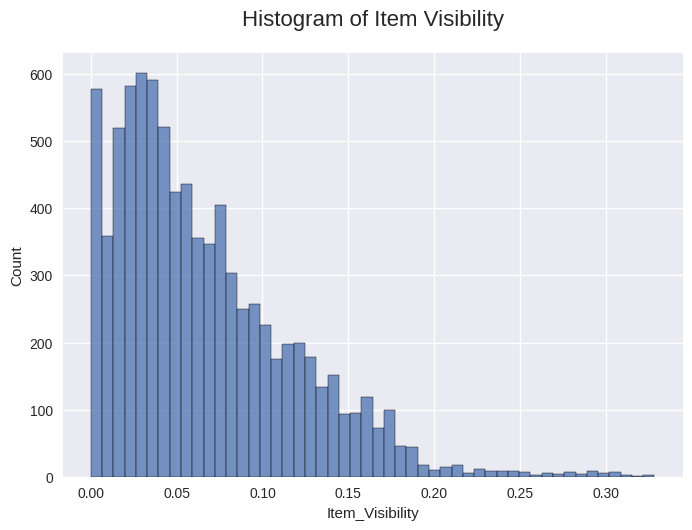

In [34]:
sns.histplot(data=df, x='Item_Visibility', y=None, hue=None,  stat='count', bins='auto');

plt.title('Histogram of Item Visibility', fontsize=16, pad = 20)



Text(0.5, 1.0, 'Histogram of Outlet Sales')

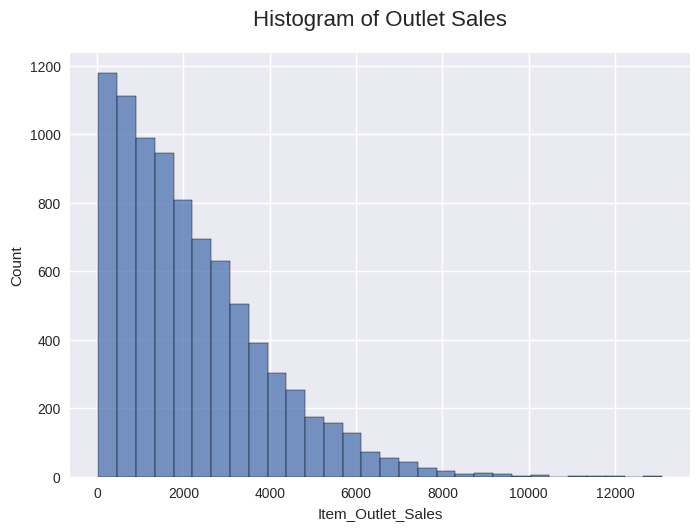

In [35]:
sns.histplot(data=df, x='Item_Outlet_Sales', y=None, hue=None,  stat='count', bins=30);
plt.title('Histogram of Outlet Sales', fontsize=16, pad = 20)


##Boxplot

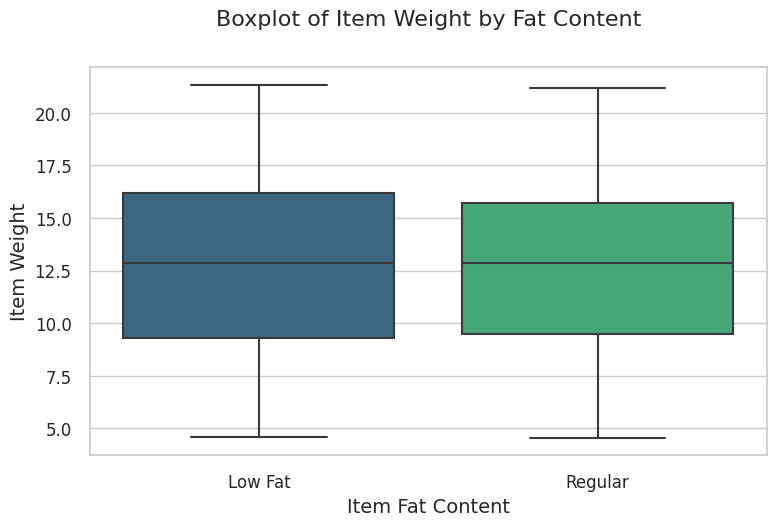

In [36]:
# Set seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# Create the boxplot
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight', palette='viridis')

# Set labels and title
plt.xlabel('Item Fat Content', fontsize=14)
plt.ylabel('Item Weight', fontsize=14)
plt.title('Boxplot of Item Weight by Fat Content', fontsize=16, pad = 30)

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the figure layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


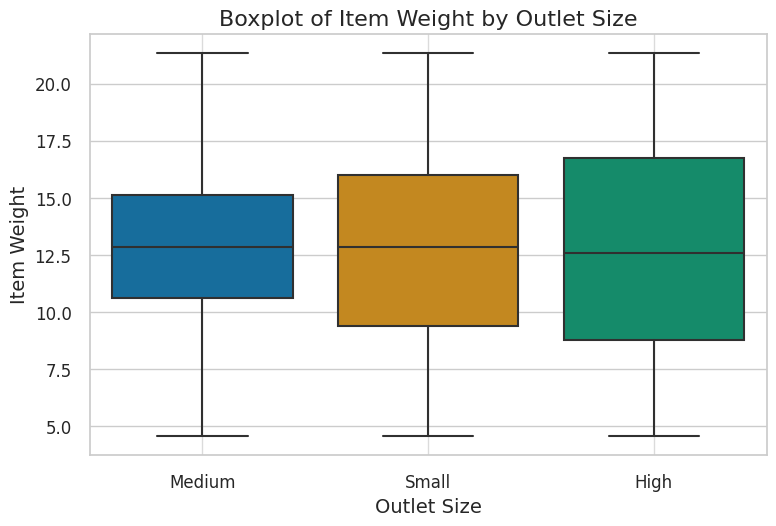

In [37]:

sns.set(style='whitegrid', font_scale=1.2)

sns.boxplot(data=df, x='Outlet_Size', y='Item_Weight', palette='colorblind')


plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Weight', fontsize=14)
plt.title('Boxplot of Item Weight by Outlet Size', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical grid lines
plt.grid(axis='x', linestyle='-', alpha=0.7)


plt.tight_layout()


plt.show()


##Heatmap

In [38]:
corr = df.corr()
corr

<ipython-input-38-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

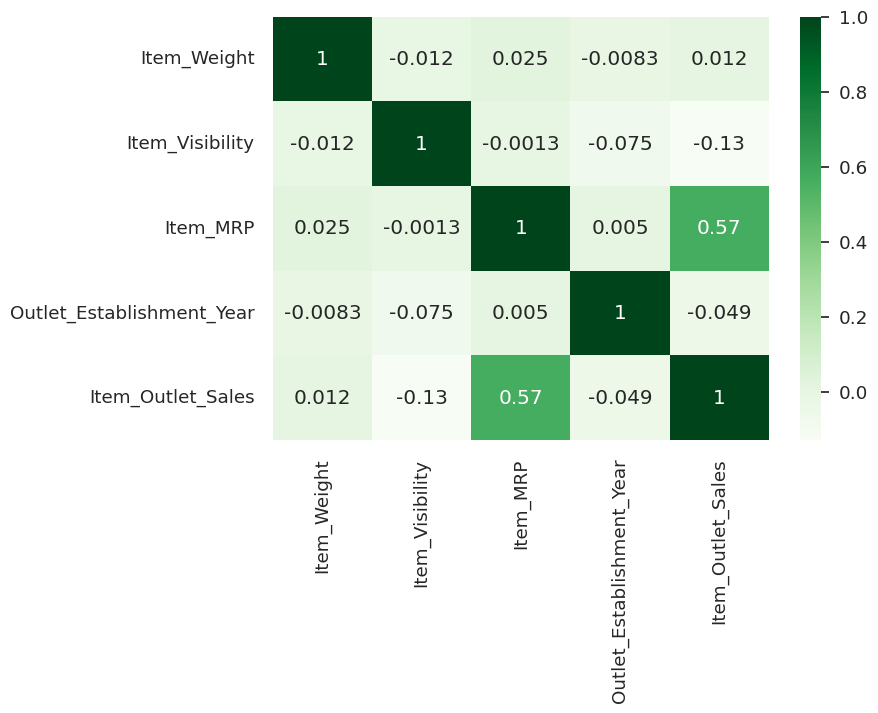

In [39]:
# Generating the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True)

#Part 4

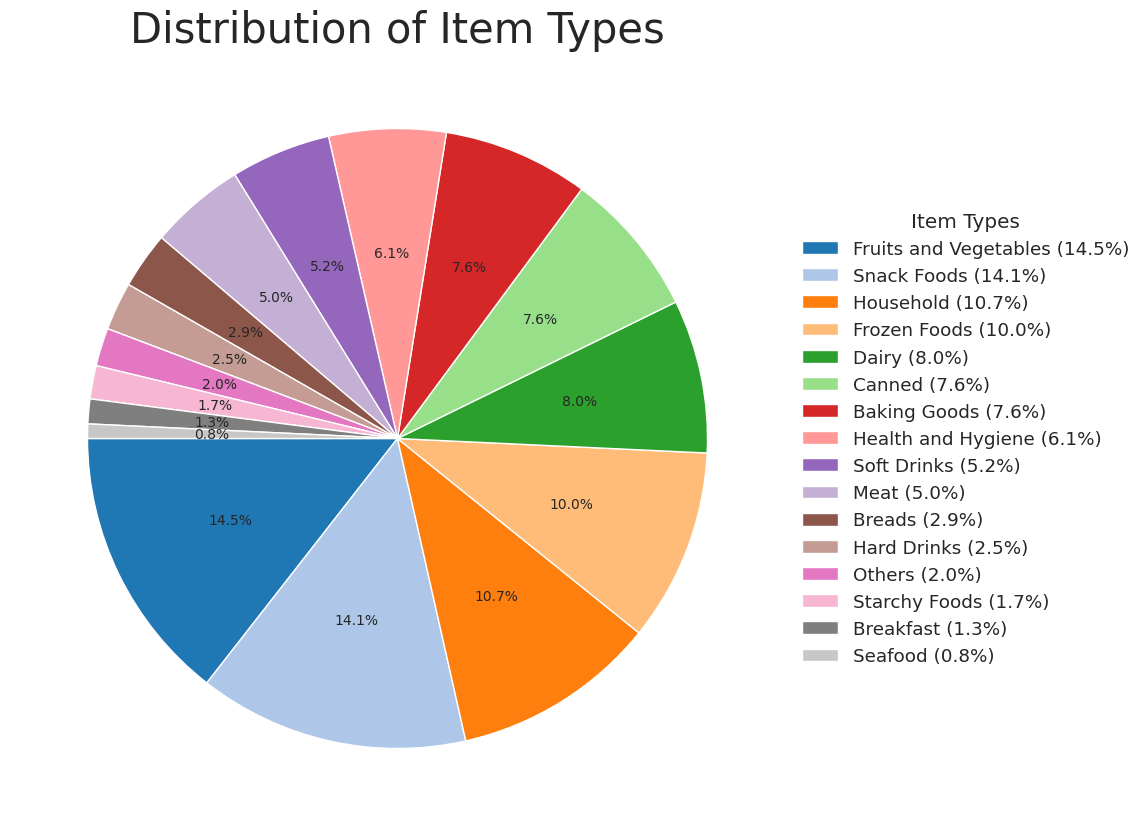

In [110]:
# Count the occurrences of each item type
item_type_counts = df['Item_Type'].value_counts()
# Plotting a pie chart
fig, ax = plt.subplots(figsize=(10, 20))
wedges, texts, autotexts = ax.pie(item_type_counts, autopct='%1.1f%%', startangle=180, colors = plt.cm.tab20.colors ,textprops=dict(fontsize=10))
# Rotate the percentage labels inside the pie chart
for autotext in autotexts:
    autotext.set(rotation= 'horizontal', ha='center', va='center' )
# Adding legend
legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(item_type_counts.index, item_type_counts / item_type_counts.sum() * 100)]
ax.legend(wedges, legend_labels, title="Item Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Item Types',fontsize=30, ha='center', va='top')
plt.show()


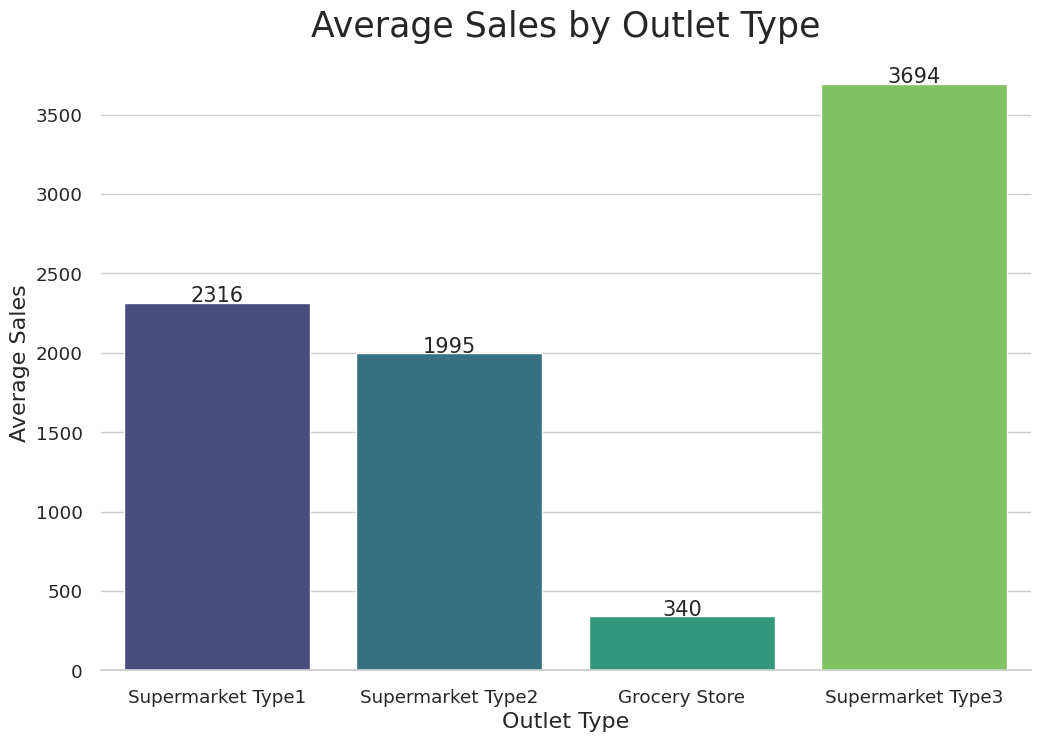

In [114]:
# Grouped bar chart
plt.figure(figsize=(12, 8))
ax=sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',  palette='viridis', errorbar=None)
# annote
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=15, xytext=(0, 5),
                textcoords='offset points')

sns.despine(left=True)
plt.title('Average Sales by Outlet Type',fontsize=25, ha='center', va='center', pad = 20)
plt.xlabel('Outlet Type',fontsize=16)
plt.ylabel('Average Sales',fontsize=16)
plt.show()


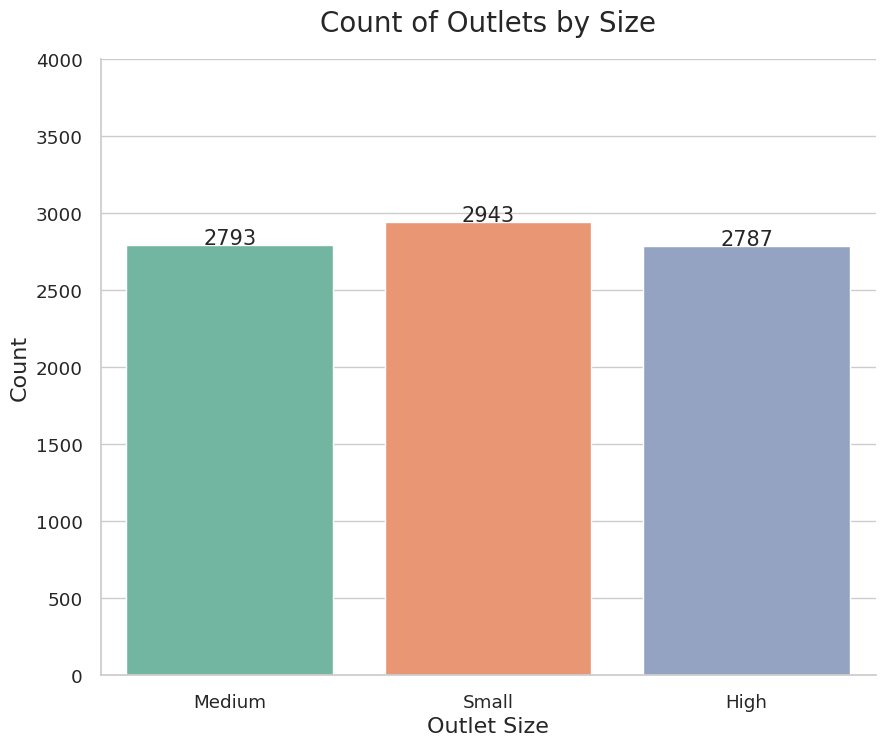

In [121]:
# Count plot for Outlet Size
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Outlet_Size', palette='Set2')
# annote
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=15, xytext=(0, 5),
                textcoords='offset points')
ax.set_ylim(0, 4000)
# Adding title and labels
plt.title('Count of Outlets by Size', fontsize=20, pad = 20)
plt.xlabel('Outlet Size', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.show()


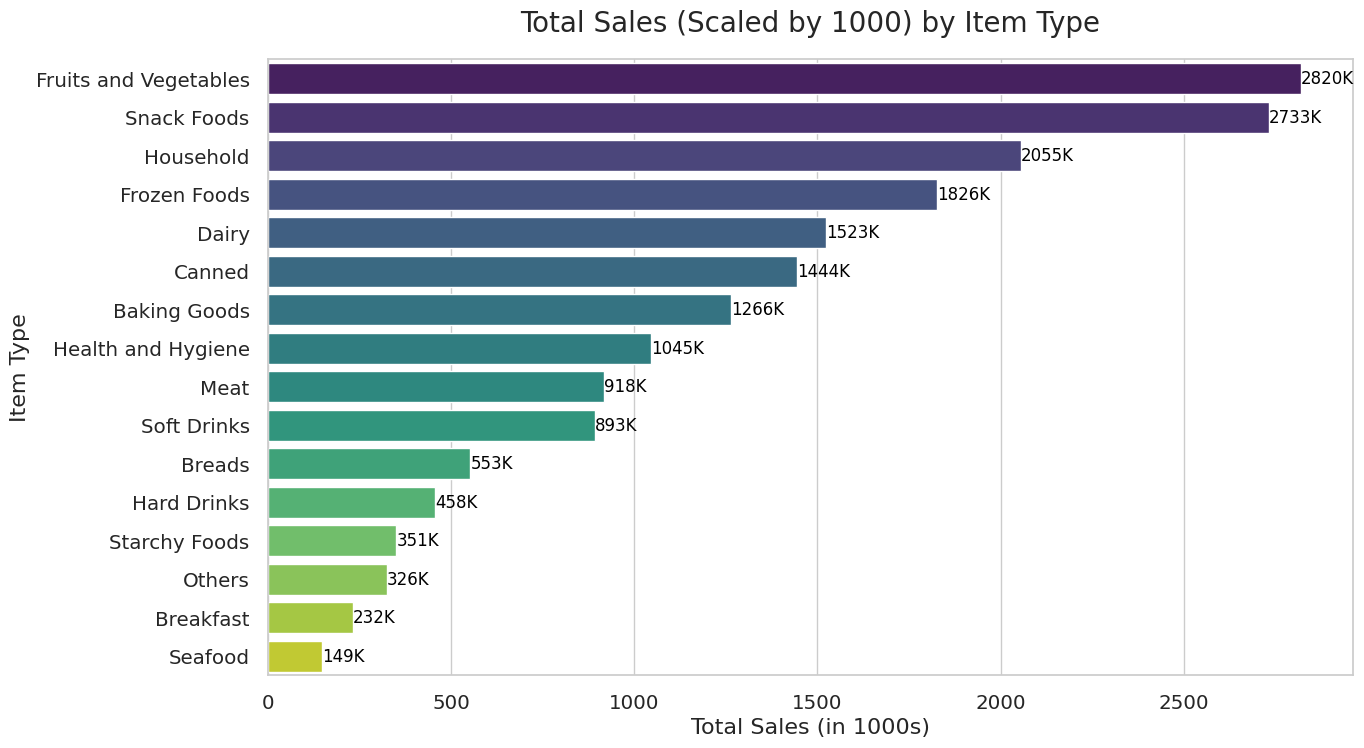

In [148]:
# Calculate total sales for each item type
total_sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Scale down total sales by dividing by 1000
total_sales_scaled = total_sales_by_item_type / 1000

# Bar plot for scaled total sales by item type
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=total_sales_scaled.values, y=total_sales_scaled.index, palette='viridis')

# Adding annotations with formatted scaled total sales values
for i, value in enumerate(total_sales_scaled.values):
    ax.text(value, i, f'{value:.0f}K', va='center', fontsize=12, color='black')

# Adding title and labels
plt.title('Total Sales (Scaled by 1000) by Item Type', fontsize=20, pad = 20)
plt.xlabel('Total Sales (in 1000s)', fontsize=16)
plt.ylabel('Item Type', fontsize=16)

plt.show()
